# Chương 3
## Danh sách nhóm
3.1 Dương Văn Dũng

3.2 Nguyễn Hà Doanh

3.3 Nguyễn Việt Dũng

3.4 Phan Thúc Định

3.5 Vũ Thị Phương Giang

3.6 Hoàng Thị Hảo

3.7 Nguyễn Thị Minh Hằng

3.8 Phạm Bá Ngọc Hiển

3.9 Lê Huy Hoàng

3.10 Đào Đức Hiếu

3.11 Lê Minh Hiếu

## 3.1

3.1. Phần dư chuẩn hóa ri' đo lường sự giảm trong tổng bình phương phần dư (RSS) (chia cho s^2) khi bỏ đi quan sát
i khỏi dữ liệu. Hãy minh họa điều này trong R bằng cách sử dụng dữ liệu lungcap như sau:

- Xây dựng mô hình LC.lm (Ví dụ 3.1, trang 97). Tính tổng bình phương phần dư (RSS), s^2, và các phần dư chuẩn hóa từ mô hình này.
- Loại bỏ quan sát 1 khỏi lungcap và xây dựng lại mô hình mà không có quan sát 1. Gọi mô hình này là LC.omit1. Tính sự khác biệt giữa RSS của mô hình đầy đủ LC.lm và của mô hình LC.omit1.
- Chứng minh rằng sự khác biệt này chia cho s^2 bằng bình phương của phần dư chuẩn hóa cho quan sát 1.

Lặp lại quy trình trên cho từng quan sát i, và chứng minh rằng
n sự khác biệt chia cho s^2 bằng các phần dư chuẩn hóa bình phương.

In [ ]:
rm(list=ls())
library(data.table)
install.packages('GLMsData')
library(GLMsData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(lungcap)
head(lungcap)

,Age,FEV,Ht,Gender,Smoke
,<int>,<dbl>,<dbl>,<fct>,<int>
1,3,1.072,46,F,0
2,4,0.839,48,F,0
3,4,1.102,48,F,0
4,4,1.389,48,F,0
5,4,1.577,49,F,0
6,4,1.418,49,F,0


In [ ]:
lungcap$Smoke <- factor(lungcap$Smoke,
                        levels=c(0, 1),
                        labels=c("Non-smoker","Smoker"))


LC.lm <- lm( FEV ~ Ht + Gender + Smoke, data=lungcap)

# Calculate RSS, variance s^2, and standard residuals
RSS <- sum(resid(LC.lm)^2)
s2 <- RSS / LC.lm$df.residual
standard_residuals <- rstandard(LC.lm)

# Create data frame store sesults
results <- data.frame(Observation = 1:nrow(lungcap),
                      StandardizedResiduals = standard_residuals,
                      RSS_Difference = NA,
                      RSS_Diff_Div_S2 = NA)

for (i in 1:nrow(lungcap)) {
  # Omit obs i and refit model
  LC.omit <- lm(FEV ~ Ht + Gender + Smoke, data = lungcap[-i, ])

  # RSS_omit
  rss_omit <- sum(resid(LC.omit)^2)

  # Diff in RSS
  rss_diff <- RSS - rss_omit

  # Store results
  results$RSS_Difference[i] <- rss_diff
  results$RSS_Diff_Div_S2[i] <- rss_diff / s2
}

# Add squared standardized residuals for comparison
results$StdResid_Squared <- standard_residuals^2

# Check the relationship
results$check <-  results$RSS_Diff_Div_S2 - results$StdResid_Squared

range(results$check) #-1.463274e-13  7.232584e-12

[1] 1.321165e-13 1.206701e-12

## 3.2
Consider the hat matrix $H$ as defined in (3.3) (p. 101).

1. Show that $H$ is idempotent; that is, $H^2 = H$.
2. Show that $H$ is symmetric; that is, $H^T = H$.
3. Show $I_n − H$ is idempotent and symmetric.

### 3.2.1
Chứng minh H là đồng nhất


Cần chứng minh $H = X_w(X_w^T X_w)^{-1} X^T$ đồng nhất.

$$\begin{aligned}
H \times H &= X(X^T X)^{-1} X^T \times X(X^T X)^{-1} X^T \\
&= X(X^T X)^{-1} (X^T X) (X^T X)^{-1} X^T \\
&= X(X^T X)^{-1} I X^T \\
&= X(X^T X)^{-1} X^T \\
&= H \\
\end{aligned}$$

### 3.2.2

Chứng minh ma trận H đối xứng.

Cần chứng minh $H = X_w(X_w^T X_w)^{-1} X^T$ đối xứng. Tức là $H^T = H$

Ta có:

$$H = X (X^T X)^{-1} X^T$$
$$\rightarrow H^T = (X (X^T X)^{-1} X^T)^T$$

Tính chất chuyển vị
1. $(AB)^T = B^T A^T$ (Chuyển vị của tích hai ma trận là tích của các chuyển vị của chúng theo thứ tự đảo ngược)
2. $(A^T)^T = A$ (Chuyển vị của chuyển vị của ma trận chính là ma trận đó)
3. $((A^T A)^{-1})^T = (A^T A)^{-1}$

Ta có

$$\begin{aligned}
H^T &= (X^T)^T (X(X^T X)^{-1})^T \ \text{(Tính chất 1)}\\
&= (X^T)^T ((X^T X)^{-1})^T (X)^T \ \text{(Tính chất 1)}\\
&= X ((X^T X)^{-1})^T (X)^T \ \text{(Tính chất 2)}\\
&= X (X^T X)^{-1} X^T \ \text{(Tính chất 3)} \\
&= H \\
\end{aligned}$$


### 3.2.3

Chứng minh $I_n − H$ là đồng nhất và đối xứng.

$I_n$ là ma trận chuyển vị có cùng số chiều với $H$.

1. Chứng minh $I_n − H$ là đồng nhất:

$$\begin{aligned}
(I-H) \times (I-H) &= II - IH - HI + HH \\
&= I - 2H + HH \ \text{(Ma trận đơn vị nhân với chính nó)} \\
&= I - 2H + H \ \text{($HH = H$, 3.2.1)} \\
&= I - H \\
\end{aligned}$$

2. Chứng minh $I_n − H$ là đối xứng.

$$\begin{aligned}
(I-H)^T &= I^T - H^T \ \text{(Ma trận đơn vị và $H^T$ đối xứng)} \\
& = I - H \\
\end{aligned}$$

## 3.3

Hãy xem xét một mô hình hồi quy tuyến tính đơn giản, với tất cả các trọng số trước đó được đặt thành một và bao gồm một số hạng không đổi trong dự đoán tuyến tính.
1. CMR:

$$h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{j=1}^{n}(x_j - \bar{x})^2}$$

2. Sử dụng biểu thức này để CMR: $h_i \ge (1/n)$.
3. CMR $h_i \le 1$.  GỢI Ý: Vì $H$ là lũy đẳng (Problem 3.2), trước hết hãy CM $h_i = \sum_{j=1}^{n} h_{ij}^2 = h_i^2 + \sum_{j \not = i} h_{ij}^2$.

Để bắt đầu, hãy nhớ lại ma trận mũ $H$.

$$H = X^T (X^T X)^{-1} X$$



Công thức này tạo ra ma trận $n \times n$ .  Các phần tử thuộc đường chéo của $H$, $h_{ii} = h_i$, là "đòn bẩy" - mức độ ảnh hưởng của một điểm dữ liệu nhất định trong việc xác định giá trị dự đoán của nó.  Chúng ta có thể tìm thấy $h_i$ như sau:

$$h_i = \vec{x}_{.i}^T (X^T X)^{-1} \vec{x}_{.i}$$


trong đó $\vec{x}_{.i}$ có nghĩa là véc-tơ $\vec{x}_{.i} = [1 \ x_i]$, với $1$ đại diện cho điểm chặn và $x_i$ là giá trị của $x$ thứ $i$.

#### 3.3.1

Với ma trận 2x2: \\
$$\begin{aligned}
h_i &= \begin{bmatrix} 1 & x_i \end{bmatrix}
\left(
\begin{bmatrix}
n & \vec{1}^T X \\
X^T \vec{1} & X^T X \\
\end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 \\
x_i \end{bmatrix} \\
&= \begin{bmatrix} 1 & x_i \end{bmatrix}
\left(
\begin{bmatrix}
n & \sum_j x_j \\
\sum_j x_j & \sum_j x_j^2 \\
\end{bmatrix}
\right) ^{-1}
\begin{bmatrix} 1 \\
x_i \end{bmatrix} \\
&= \begin{bmatrix} 1 & x_i \end{bmatrix}
\left(
\frac{1}{n \sum_j x_j^2 - (\sum_j x_j)^2}
\begin{bmatrix}
\sum_j x_j^2 & -\sum_j x_j \\
-\sum_j x_j & n \\
\end{bmatrix}
\right)
\begin{bmatrix} 1 \\
x_i \end{bmatrix} \\
&= \frac{1}{n \sum_j x_j^2 - (\sum_j x_j)^2}
\left(
\begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix}
\sum_j x_j^2 & -\sum_j x_j \\
-\sum_j x_j & n \\
\end{bmatrix}
\begin{bmatrix} 1 \\
x_i \end{bmatrix}
\right) \\
&= \frac{1}{n \sum_j (x_j - \bar{x})^2}
\left(
\sum_j x_j^2 - 2 x_i \sum_j x_j + n x_i^2
\right) \\
&\text{Vì } \sum_j x_j = n \bar{x} \text{ và } \sum_j x_j^2 = n \bar{x}^2 + \sum_j (x_j - \bar{x})^2 \\
&= \frac{1}{n \sum_j (x_j - \bar{x})^2}
\left(
n \bar{x}^2 + \sum_j (x_j - \bar{x})^2 - 2 n x_i \bar{x} + n x_i^2
\right) \\
&=  \frac{1}{n \sum_j (x_j - \bar{x})^2}
\left(
n(\bar{x}^2 - 2 x_i \bar{x} + x_i^2) + \sum_j (x_j - \bar{x})^2
\right) \\
&= \frac{n(x_i - \bar{x})^2}{n \sum_j (x_j - \bar{x})^2} +
\frac{\sum_j (x_j - \bar{x})^2}{n \sum_j (x_j - \bar{x})^2} \\
&= \frac{(x_i - \bar{x})^2}{\sum_j (x_j - \bar{x})^2} + \frac{1}{n} \\
&= \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_j (x_j - \bar{x})^2} \\
\end{aligned}$$

#### 3.3.2

***Sử dụng biểu thức này để chứng minh rằng $h_i \ge (1/n)$.***

Từ biểu thức từ câu 3.3.1, chúng ta thấy rằng $h_i$ là $\frac{1}{n}$ CỘNG VỚI MỘT SỐ KHÔNG ÂM (chúng ta biết nó không âm vì các số hạng bình phương), vì vậy nó phải tuân theo $h_i \ge \frac{1}{n}$.

#### 3.3.3

*** Chứng minh rằng $h_i \le 1$.  GỢI Ý: Vì $H$ là lũy đẳng (Bài toán 3.2), trước tiên, ta có: $h_i = \sum_{j=1}^{n} h_{ij}^2 = h_i^2 + \sum_{j \not = i} h_ {ij}^2$.***

Nhớ lại rằng $H$ là lũy đẳng và đối xứng.  Điều này ngụ ý rằng đối với mỗi phần tử trong $H$, $h_{ij}$,

$$h_{ij} = \sum_{k=1}^n h_{ik} h_{kj}$$

Đối với các phần tử đường chéo, $h_i$, có thể được mở rộng thành

$$h_i = h_i^2 + \sum_{j \not = i} h_{ij}^2$$

ví dụ:

$$\begin{bmatrix}
h_{11} & h_{12} \\
h_{21} & h_{22}
\end{bmatrix}
\begin{bmatrix}
h_{11} & h_{12} \\
h_{21} & h_{22}
\end{bmatrix}
=\begin{bmatrix}
h_{11}^2 + h_{12} h_{21} & h_{11} h_{12} + h_{12} h_{22} \\
h_{11} h_{21} + h_{21} h_{22} & h_{12} h_{21} + h_{22}^2 \\
\end{bmatrix}$$

Vì $H$ có tính đối xứng nên chúng ta có thể đặt lại như sau

$$\begin{bmatrix}
h_{11}^2 + h_{12}^2 & h_{11} h_{12} + h_{12} h_{22} \\
h_{11} h_{21} + h_{21} h_{22} & h_{22}^2 +h_{21}^2 \\
\end{bmatrix}$$

Mà theo tính chất lũy đẳng, $H$ = $H^2$: \\
Lưu ý rằng các số hạng đường chéo $h_i$ thực sự tuân theo $h_i = h_i^2 + \sum_{j \not = i} h_{ij}^2$.

Vì cả $h_i^2$ và $\sum_{j \not = i} h_{ij}^2$ nhất thiết phải dương và tổng bằng $h_i$, nên chúng ta biết rằng $h_i \ge h_i^2$.  Do đó, chúng ta kết luận rằng $h_i \le 1$.

## 3.4

Phương trình (3.6)

$$D = \frac{(r')^2}{p'} \frac{h}{1-h}$$

(tr. 110) đưa ra một biểu thức cho khoảng cách của Cook, cũng có thể được viết là

$$D_i = \frac{(\boldsymbol{\hat{\mu}} - \boldsymbol{\hat{\mu}}_{(i)})^T (\boldsymbol{\hat{\mu}} - \boldsymbol{\hat{\mu}}_{(i)})}{p' s^2}$$

Giải thích khoảng cách của Cook bằng cách sử dụng công thức này.


Khoảng cách Cook giúp xác định các quan sát có ảnh hưởng bất thường đến mô hình hồi quy. Các điểm này có thể là:

+ Điểm ngoại lai (outliers): Những điểm nằm ngoài mô hình dự đoán thông thường.
+ Điểm đòn bẩy cao (high leverage points): Những điểm có giá trị đặc biệt của biến đầu vào (explanatory variable) và có ảnh hưởng lớn đến các hệ số hồi quy

Ý nghĩa toán học

1. Các tham số trong công thức:  
  $$
D_i = \frac{(\hat{\mu} - \hat{\mu}(i))^T (\hat{\mu} - \hat{\mu}(i))}{p s^2}  
$$  
  - $\hat{\mu}$ là vector giá trị ước lượng hồi quy với tất cả dữ liệu.  
  - $\hat{\mu}(i)$ là vector giá trị ước lượng hồi quy khi loại bỏ quan sát thứ \(i\).  
  - $\hat{\mu} - \hat{\mu}(i)$ là vector khác biệt giữa giá trị ước lượng với và không có quan sát thứ \(i\).  
  - Chữ \(T\) là chuyển vị

2. Diễn giải hình học & ngưỡng xác định ảnh hưởng:  
   - Khoảng cách Cook đo lường sự thay đổi trong kết quả của mô hình nếu loại bỏ một quan sát cụ thể. Nếu  $ D_i  $ cao, điều này cho thấy rằng quan sát  $ i  $ có thể là ngoại lai và ảnh hưởng lớn đến các tham số ước lượng.  

   - Nếu  $ D_i > 1  $ hoặc  $ D_i > \frac{4}{n}  $ (với  $ n  $ là số quan sát), thì quan sát đó có khả năng là một ngoại lệ có ảnh hưởng lớn.  

Khoảng cách Cook giúp đảm bảo rằng mô hình không bị chi phối quá mức bởi một vài quan sát đặc biệt, từ đó duy trì tính chính xác và khả năng tổng quát hóa (generalization) của mô hình.


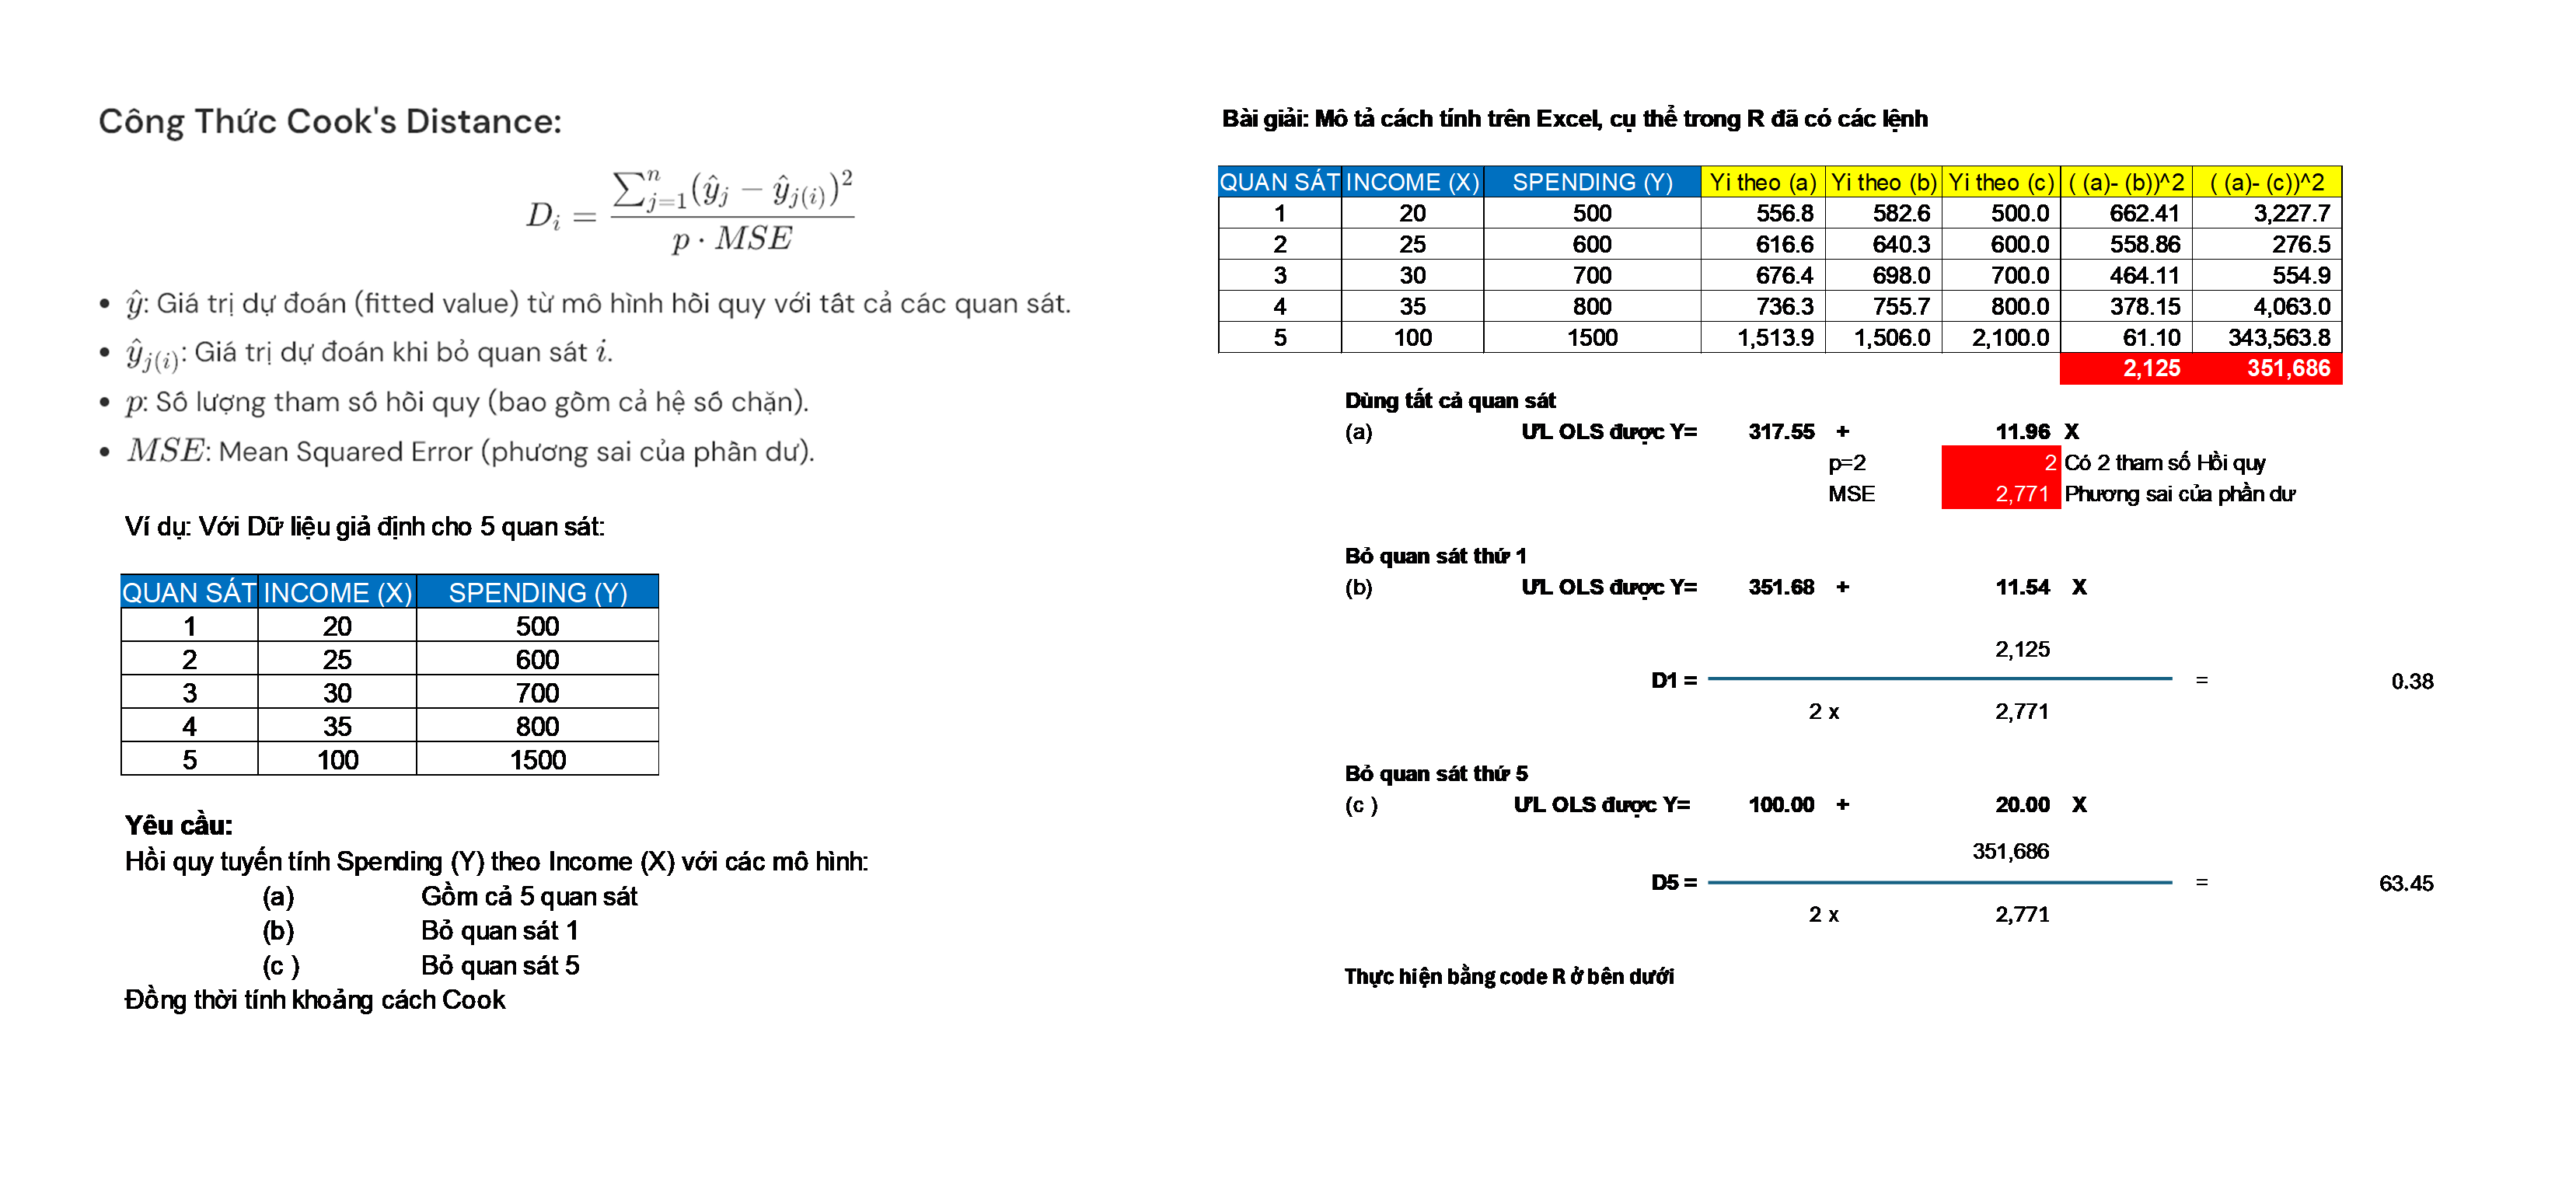

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = Spending ~ Income, data = data)

Residuals:
     1      2      3      4      5 
-56.81 -16.63  23.56  63.74 -13.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   317.55      41.03    7.74 0.004485 ** 
Income         11.96       0.80   14.95 0.000649 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.64 on 3 degrees of freedom
Multiple R-squared:  0.9868,	Adjusted R-squared:  0.9823 
F-statistic: 223.6 on 1 and 3 DF,  p-value: 0.0006491


Warning message in summary.lm(model_exclude_5):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = Spending ~ Income, data = data_exclude_5)

Residuals:
1 2 3 4 
0 0 0 0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)      100          0     Inf   <2e-16 ***
Income            20          0     Inf   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0 on 2 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic:   Inf on 1 and 2 DF,  p-value: < 2.2e-16


Max.Cook.5 Min.Cook.2 
         5          2

          1           2           3           4           5 
 0.38331888  0.02474847  0.03972229  0.24902709 63.45000000 


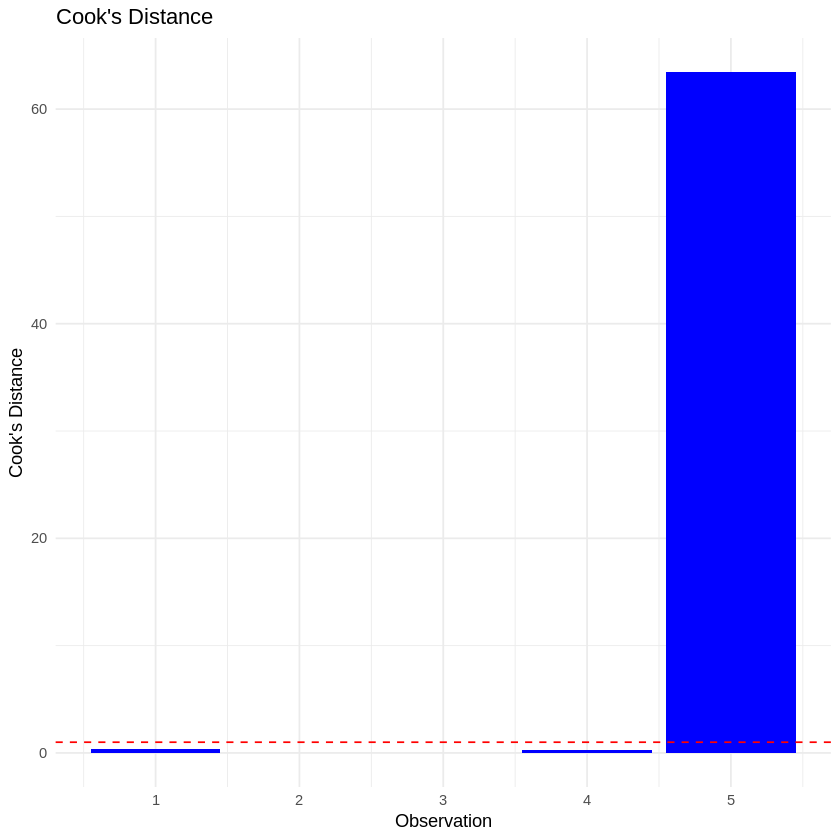

In [ ]:
# Cài đặt gói ggplot2
install.packages("ggplot2")
library(ggplot2)

# Tạo dữ liệu
data <- data.frame(
  Income = c(20, 25, 30, 35, 100),  # Thu nhập
  Spending = c(500, 600, 700, 800, 1500)  # Chi tiêu
)

# Dữ liệu ban đầu
data <- data.frame(
  Income = c(20, 25, 30, 35, 100),  # Thu nhập
  Spending = c(500, 600, 700, 800, 1500)  # Chi tiêu
)

# 1. Xây dựng Mô hình với đủ các quan sát
model_full <- lm(Spending ~ Income, data = data)
summary(model_full)


# 2. Xây dựng Mô hình bỏ quan sát 5
# Cho thấy KQ hệ số UL sẽ chênh đáng kể
data_exclude_5 <- data[-5, ]
model_exclude_5 <- lm(Spending ~ Income, data = data_exclude_5)
summary(model_exclude_5)


# Tính toán khoảng cách Cook cho model có đủ quan sát
cooks_distances <- cooks.distance(model_full)
# In ra vị trí của quan sát có khoảng cách Cook lớn nhất, bé nhất
max_index <- which.max(cooks_distances)  # Chỉ mục của khoảng cách Cook lớn nhất
min_index <- which.min(cooks_distances)  # Chỉ mục của khoảng cách Cook nhỏ nhất
c(Max.Cook= max_index,Min.Cook= min_index)

# Trực quan hóa khoảng cách Cook
cooks_df <- data.frame(Observation = 1:nrow(data), CooksDistance = cooks_distances)

ggplot(cooks_df, aes(x = Observation, y = CooksDistance)) +
  geom_bar(stat = "identity", fill = "blue") +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +  # Ngưỡng 1
  labs(title = "Cook's Distance", x = "Observation", y = "Cook's Distance") +
  theme_minimal()
# Xem khoảng cách Cook
print(cooks_distances)
#Nếu khoảng cách Cook cho một quan sát nào đó lớn hơn 1 hoặc vượt quá ngưỡng
# 4/n với n là số điểm dữ liệu), quan sát đó có thể là một ngoại lệ và cần được xem xét kỹ lưỡng##

### 3.5
To gain experience reading Q–Q plots, use r to produce Q–Q plots of
data known to be generated randomly from a standard normal distribution
using rnorm(). Generate ten Q–Q plots based on 100 random numbers, and
comment on using Q–Q plots when n = 100. Repeat the exercise for n = 50,
20 and 10, and comment further.


Thực hiện và phân tích các Q-Q plots của dữ liệu ngẫu nhiên được tạo ra từ phân phối chuẩn với các cỡ mẫu khác nhau: n= 100, n=50, n =20, n=10
Sinh tập dữ liệu ngẫu nhiên từ phân phối chuẩn hóa. Tạo QQ Plot từ tập mẫu với kích cỡ khác nhau  n= 100, n=50, n =20, n=10
Yêu cầu: Nhận xét hiệu quả của Q–Q plot phụ thuộc vào kích thước mẫu như thế nào?


#### Phân phối chuẩn

Q-Q Plots for n = 100
Q-Q Plots for n = 50


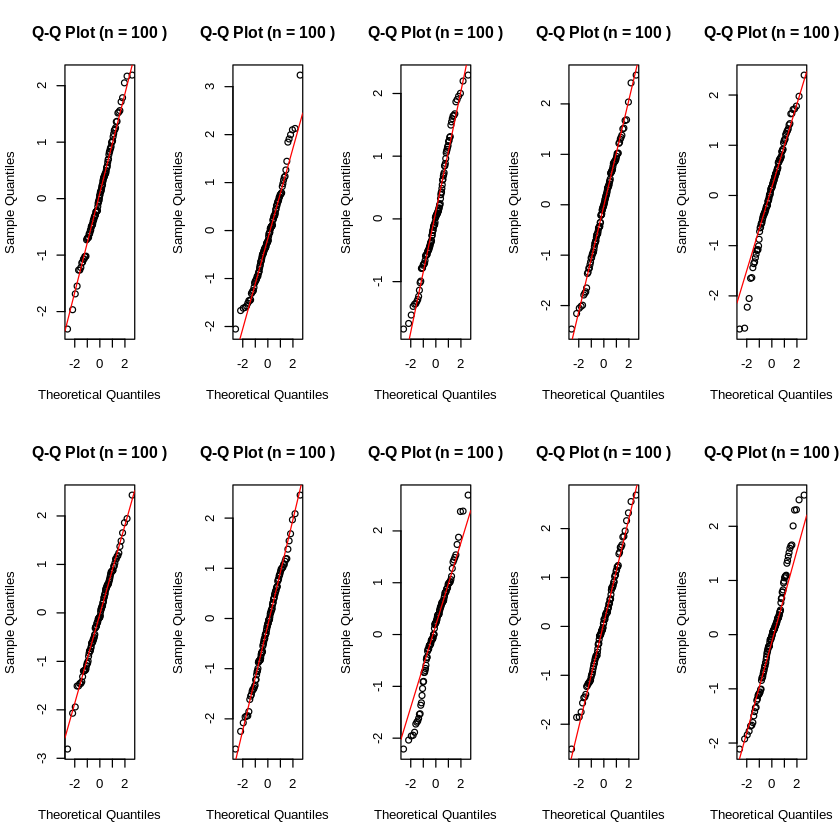

Q-Q Plots for n = 20


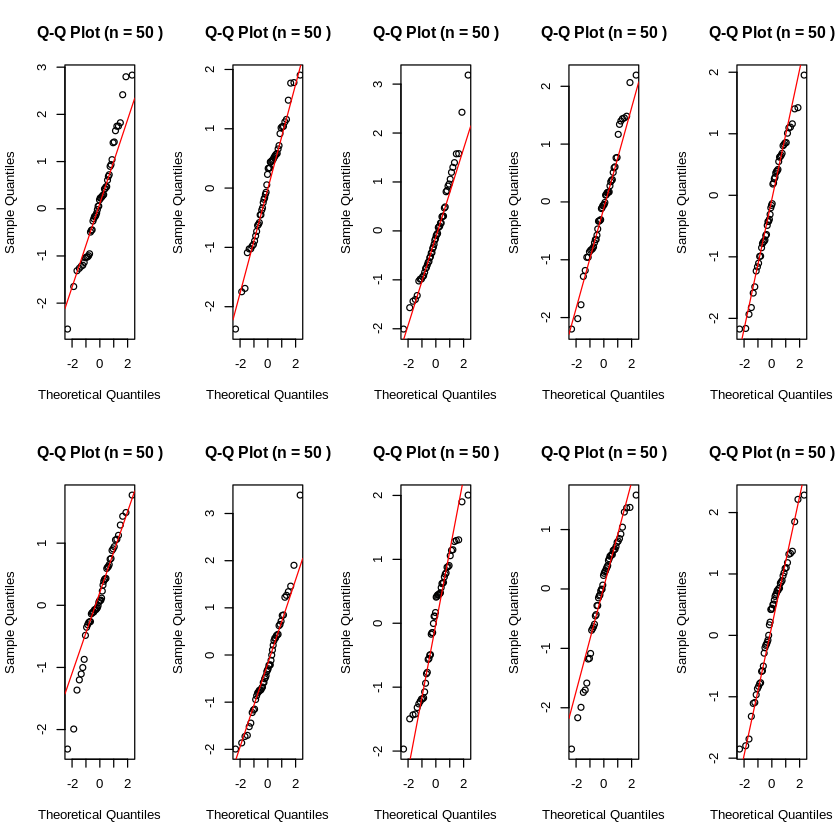

Q-Q Plots for n = 10


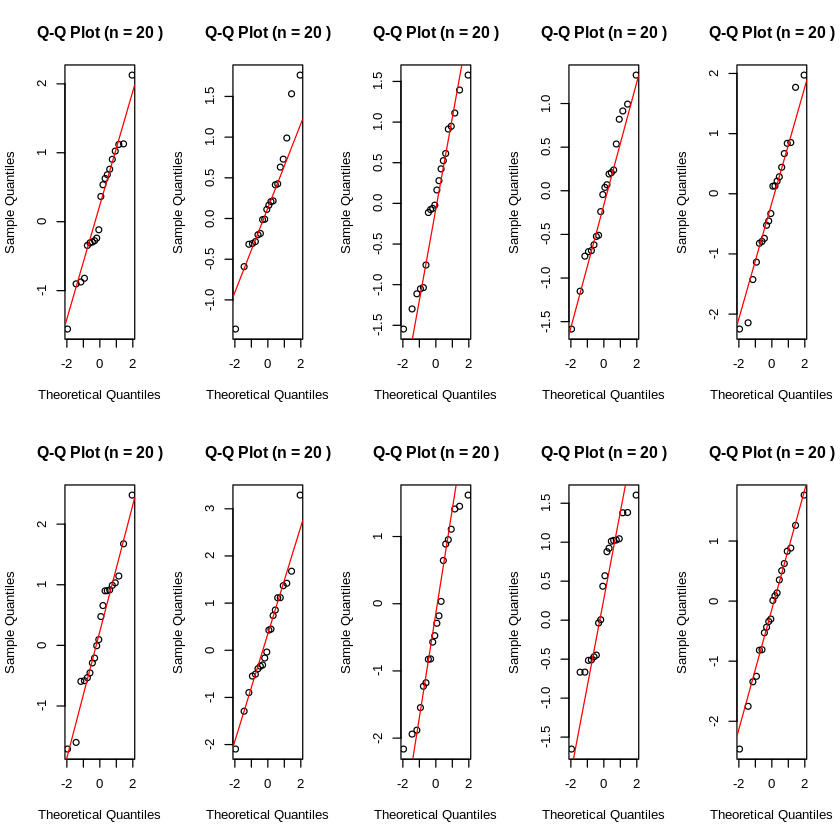

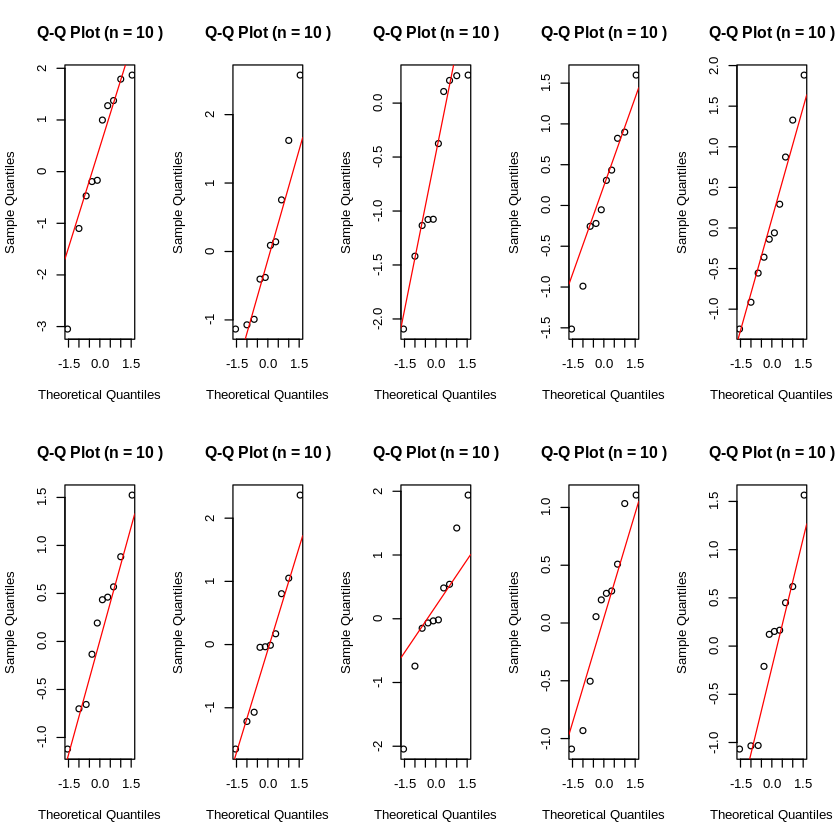

In [ ]:
gen_qq_plots <- function(n, num_plots = 10) {
  par(mfrow = c(2, 5)) #chia khung đồ thị: 2 hàng, 5 cột
  for (i in 1:num_plots) {
    sample_data <- rnorm(n) #tạo dữ liệu ngẫu nhiên từ phân phối chuẩn
    qqnorm(sample_data, main = paste("Q-Q Plot (n =", n, ")"))
    qqline(sample_data, col = "red")
  }
  par(mfrow = c(1, 1))  # Reset plot layout
}

# Tạo Q-Q plots với các cỡ mẫu khác nhau
set.seed(123)
cat("Q-Q Plots for n = 100\n")
gen_qq_plots(100)

cat("Q-Q Plots for n = 50\n")
gen_qq_plots(50)

cat("Q-Q Plots for n = 20\n")
gen_qq_plots(20)

cat("Q-Q Plots for n = 10\n")
gen_qq_plots(10)
# sample càng lớn càng giống norm dist

**=> Kết luận**
Khi kích thước mẫu (n) tăng, các điểm trong Q-Q plot bám sát đường thẳng chuẩn, phản ánh dữ liệu gần đúng với phân phối chuẩn. Với mẫu nhỏ, Q-Q plot dễ bị sai lệch, đặc biệt ở phần đuôi, do nhiễu từ ngẫu nhiên hóa. Điều này minh họa rằng kích thước mẫu đủ lớn là cần thiết để kiểm tra dữ liệu tuân theo phân phối chuẩn.

#### Phân phối Uniform

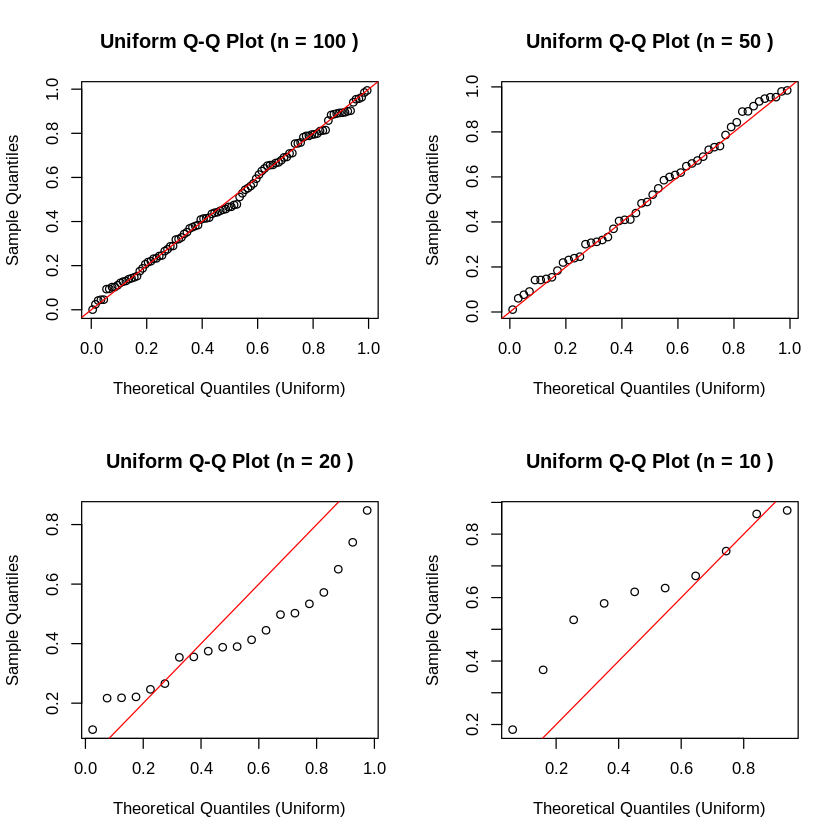

In [ ]:
set.seed(123)

# Lặp qua các kích cỡ mẫu
sample_sizes <- c(100, 50, 20, 10)

par(mfrow = c(2, 2))  # Bố cục đồ thị 2x2
for (n in sample_sizes) {
  data_uniform <- runif(n)  # Dữ liệu Uniform(0, 1)

  # Vẽ Q-Q plot
  qqplot(qunif(ppoints(n)), data_uniform,
         main = paste("Uniform Q-Q Plot (n =", n, ")"),
         xlab = "Theoretical Quantiles (Uniform)",
         ylab = "Sample Quantiles")
  abline(0, 1, col = "red")  # Đường tham chiếu
}


#### Phân phối t-Student

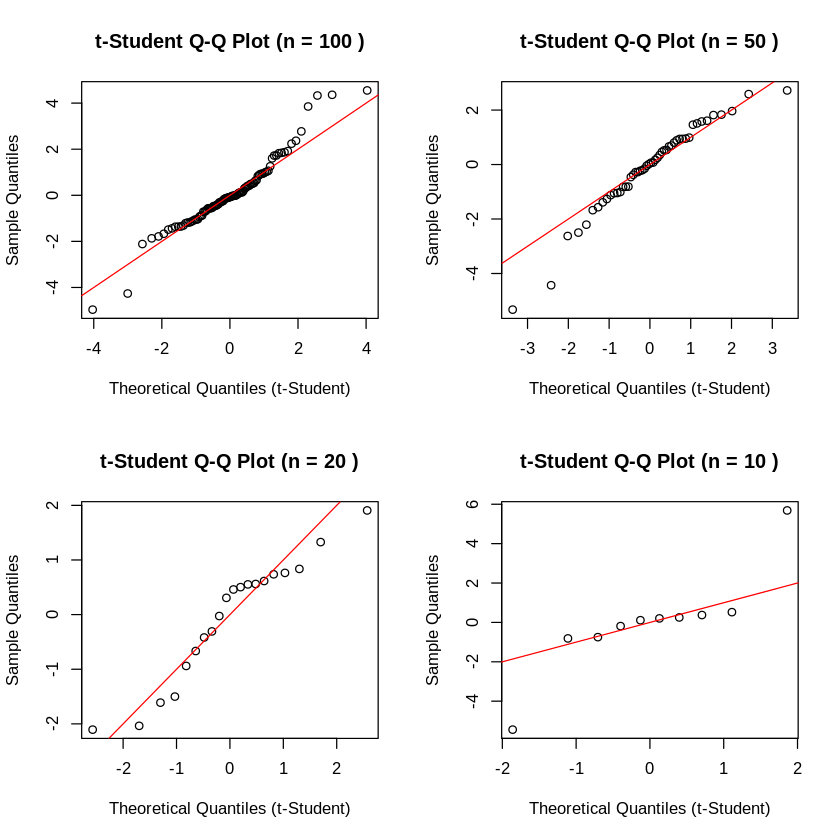

In [ ]:
set.seed(123)

par(mfrow = c(2, 2))  # Bố cục đồ thị 2x2
for (n in sample_sizes) {
  data_t <- rt(n, df = 5)  # Dữ liệu từ t-Student (df = 5)

  # Vẽ Q-Q plot
  qqplot(qt(ppoints(n), df = 5), data_t,
         main = paste("t-Student Q-Q Plot (n =", n, ")"),
         xlab = "Theoretical Quantiles (t-Student)",
         ylab = "Sample Quantiles")
  abline(0, 1, col = "red")  # Đường tham chiếu
}


#### Phân phối Chi-square

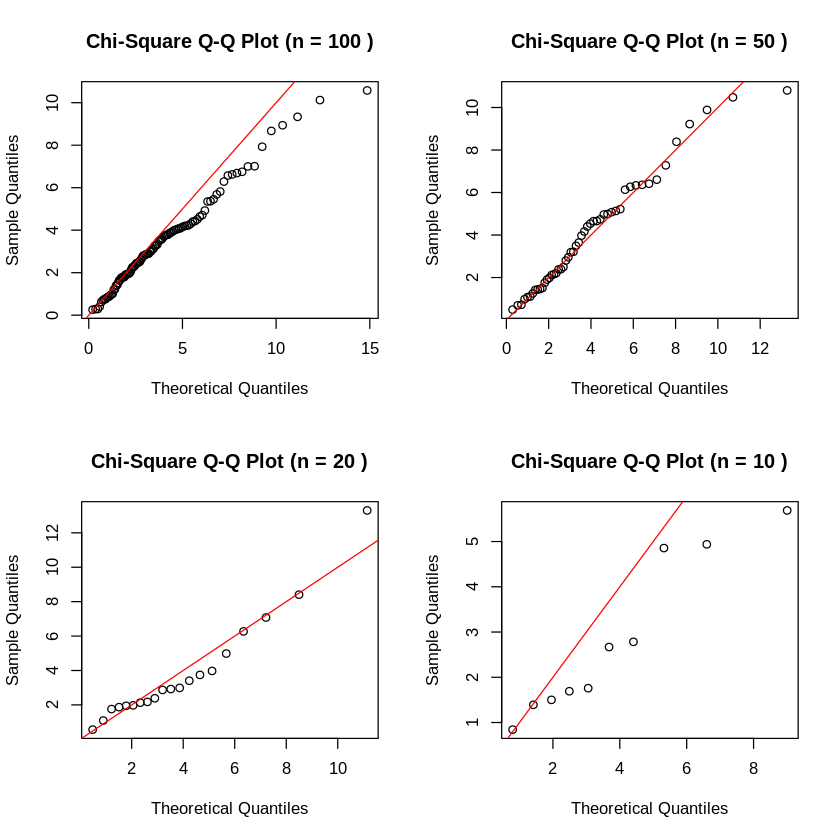

In [ ]:
set.seed(123)

# Thay đổi kích thước mẫu
sample_sizes <- c(100, 50, 20, 10)
df <- 4  # Số bậc tự do

# Vẽ Q-Q plot cho từng kích thước mẫu
par(mfrow = c(2, 2))
for (n in sample_sizes) {
  data <- rchisq(n, df = df)
  qqplot(qchisq(ppoints(n), df = df), data,
         main = paste("Chi-Square Q-Q Plot (n =", n, ")"),
         xlab = "Theoretical Quantiles",
         ylab = "Sample Quantiles")
  abline(0, 1, col = "red")
}
par(mfrow = c(1, 1))


## 3.6
Show that the partial residual plot for a simple linear regression model
is simply a plot of $y$ against $x$

In [ ]:
set.seed(123)
n <- 100
x <- rnorm(n,mean = 5, sd = 2)
y <- 2 + 3*x + rnorm(n, mean = 0, sd =2)

model <- lm(y~x)

summary(model)


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-3.815 -1.367 -0.175  1.161  6.581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0568     0.5868   3.505  0.00069 ***
x             2.9475     0.1069  27.578  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.941 on 98 degrees of freedom
Multiple R-squared:  0.8859,	Adjusted R-squared:  0.8847 
F-statistic: 760.6 on 1 and 98 DF,  p-value: < 2.2e-16


In [ ]:
y_hat <- predict(model)

# summary(y_hat)
beta1 <- coef(model)["x"]
partial_residuals <- y - y_hat + beta1 * x

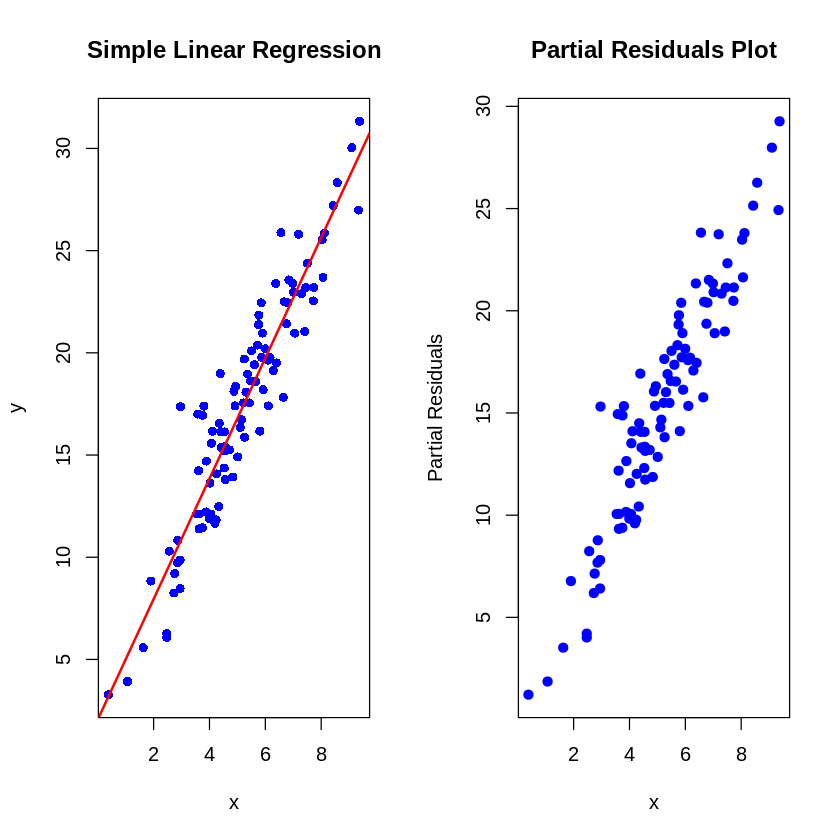

In [ ]:
#Vẽ biểu đồ
par(mfrow = c(1,2))

plot(x, y, pch = 16, col = "blue", main = "Simple Linear Regression",
     xlab = "x", ylab = "y")
abline(model, col = "red", lwd = 2)

plot(x, partial_residuals, main = "Partial Residuals Plot", xlab = "x", ylab = "Partial Residuals", pch = 19, col = "blue")
abline(h = 0, col = "red", lty = 2)

Nhận xét : Biểu đồ phần dư từng phần giống với biểu đồ mô hình hồi quy tuyến tính

## 3.7:
For the naval hospital data (data set: `nhospital`) (Example 3.18, p. 136), fit the three models that contain two of the explanatory variables. Show that the fitted values are very similar for all three models.

### 3.7 - Cách 1

In [ ]:
data(nhospital)
# Ước lượng mô hình
model1 <- lm(MainHours ~ Eligible + OpRooms, data = nhospital)
model2 <- lm(MainHours ~ Eligible + Cases, data = nhospital)
model3 <- lm(MainHours ~ OpRooms + Cases, data = nhospital)

# Tính giá trị dự đoán
fitted1 <- fitted(model1)
fitted2 <- fitted(model2)
fitted3 <- fitted(model3)
#So sánh:
comparison <- data.frame(fit1 = fitted1, fit2 = fitted2, fit3 = fitted3)

compare <- cor(comparison)
compare # Correaltion of all fit are too close to 1

,fit1,fit2,fit3
fit1,1.0000000,0.9831077,0.9847276
fit2,0.9831077,1.0000000,0.9903112
fit3,0.9847276,0.9903112,1.0000000


### 3.7 - Cách 2

For the naval hospital data (data set: `nhospital`) (Example 3.18, p. 136), fit the three models that contain two of the explanatory variables. Show that the fitted values are very similar for all three models.

Xây dựng ba mô hình hồi quy, mỗi mô hình bao gồm hai trong ba biến độc lập:
Eligible: Dân số đủ điều kiện (tính trên mỗi nghìn người).
OpRooms: Số lượng phòng phẫu thuật.
Cases: Số lượng ca phẫu thuật.
Chứng minh rằng giá trị dự đoán (fitted values) của ba mô hình này rất giống nhau.


Look data set nhospital

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(nhospital)
d <- nhospital
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Cases,Eligible,OpRooms,MainHours
,<int>,<dbl>,<int>,<dbl>
1,89,25.5,4,304.37
2,513,294.3,11,2616.32
3,231,83.7,4,1139.12
4,68,30.7,2,285.43
5,319,129.8,6,1413.77
6,276,180.8,6,1555.68


In [ ]:
m1 <- lm(MainHours ~ Cases*Eligible, data=d)
m2 <- lm(MainHours ~ Cases*OpRooms, data=d)
m3 <- lm(MainHours ~ Eligible*OpRooms, data=d)

In [ ]:
summary(m1)


Call:
lm(formula = MainHours ~ Cases * Eligible, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-204.950  -57.565    3.324   55.257  210.336 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.103e+02  1.069e+02  -1.967 0.084689 .  
Cases           4.651e+00  7.634e-01   6.092 0.000292 ***
Eligible        4.556e+00  1.139e+00   3.999 0.003955 ** 
Cases:Eligible -5.939e-03  1.534e-03  -3.871 0.004731 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 127.2 on 8 degrees of freedom
Multiple R-squared:  0.9914,	Adjusted R-squared:  0.9882 
F-statistic: 308.3 on 3 and 8 DF,  p-value: 1.327e-08


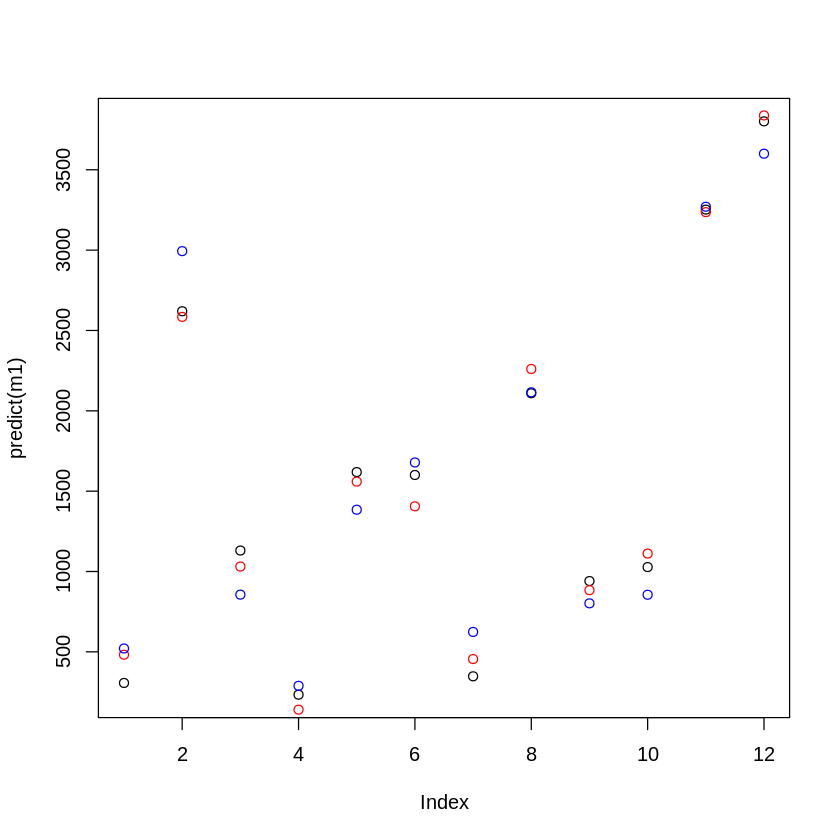

In [ ]:
plot(predict(m1))
points(predict(m2), col="red")
points(predict(m3), col="blue")

- Nguyên nhân do Hiện tượng đa cộng tuyến:
Các biến độc lập (Cases, Eligible, OpRooms) có mối tương quan rất cao

- Giá trị dự đoán (fitted values) từ ba mô hình khác nhau gần như không thay đổi.
- Sửa theo: tổng pb phần dư
- Check đa cộng tuyến



## 3.8:
The lung capacity data [21] in Example 1.1 (data set: lungcap) have used often in Chaps. 2 and 3.
1. Fit the model with fev as the response and smoking status as the only explanatory variable. Interpret the meaning of the coefficient for smoking.
2. Fit the model with fev as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.
3. Fit the model with the logarithm of fev as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.
4. Determine a suitable model for the data.

In [ ]:
data(lungcap)
# 1. Fit the model with fev as the response and smoking status as the only explanatory variable. Interpret the meaning of the coefficient for smoking
lungcap$Smoke <- factor(lungcap$Smoke,
                        levels=c(0, 1),
                        labels=c("Non-smoker","Smoker"))

Model1 <- lm( FEV ~  Smoke, data=lungcap)

beta1 = Model1$coefficients[2]

### 3.8.1. Mô hình 1: Xây dựng mô hình với FEV và Smoke
FEV (dung tích thở ra cưỡng bức) là biến phụ thuộc và Smoke (trạng thái hút thuốc) là biến độc lập
 => Giải thích ý nghĩa của hệ số hồi quy cho biến Smoke.

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(lungcap)
d <- lungcap
tail(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Age,FEV,Ht,Gender,Smoke
,<int>,<dbl>,<dbl>,<fct>,<int>
649,16,4.070,69.5,M,1
650,16,4.872,72.0,M,1
651,17,3.082,67.0,M,1
652,17,3.406,69.0,M,1
653,18,4.086,67.0,M,1
654,18,4.404,70.5,M,1


In [ ]:
m1 <- lm(FEV ~ Smoke, data=d)
summary(m1)


Call:
lm(formula = FEV ~ Smoke, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7751 -0.6339 -0.1021  0.4804  3.2269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.56614    0.03466  74.037  < 2e-16 ***
Smoke        0.71072    0.10994   6.464 1.99e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8412 on 652 degrees of freedom
Multiple R-squared:  0.06023,	Adjusted R-squared:  0.05879 
F-statistic: 41.79 on 1 and 652 DF,  p-value: 1.993e-10


- Trung bình FEV của những người không hút thuốc là 2.57 lít.
- Người hút thuốc trung bình có dung tích khí thở ra (FEV) cao hơn khoảng 0.71 lít so với người không hút thuốc.
- Giá trị `p-value` của biến Smoke là 1.99e-10, rất nhỏ hơn
`𝛼 = 0.05`
→ Hệ số
`𝛽1` là có ý nghĩa thống kê, nghĩa là hút thuốc có ảnh hưởng đáng kể đến FEV.
- Giá trị Residual standard error (0.8412) cho thấy độ lệch trung bình giữa giá trị thực tế của FEV và giá trị dự đoán là khoảng 0.84 lít.
- Ảnh hưởng của hút thuốc đến FEV là có ý nghĩa thống kê. Tuy nhiên mô hình chỉ giải thích được khoảng 6% sự biến thiên của FEV. Điều này cho thấy ngoài biến Smoke, có thể còn nhiều yếu tố khác ảnh hưởng đến FEV

### 3.8.2. Mô hình 2: FEV ~ Smoke + các biến khác

In [ ]:
m2 <- lm(FEV ~ ., d)
summary(m2)


Call:
lm(formula = FEV ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37656 -0.25033  0.00894  0.25588  1.92047 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.456974   0.222839 -20.001  < 2e-16 ***
Age          0.065509   0.009489   6.904 1.21e-11 ***
Ht           0.104199   0.004758  21.901  < 2e-16 ***
GenderM      0.157103   0.033207   4.731 2.74e-06 ***
Smoke       -0.087246   0.059254  -1.472    0.141    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4122 on 649 degrees of freedom
Multiple R-squared:  0.7754,	Adjusted R-squared:  0.774 
F-statistic:   560 on 4 and 649 DF,  p-value: < 2.2e-16


- Intercept (hệ số chặn): β0 mũ =−4.457 → Khi các giá trị của tất cả biến độc lập bằng 0 (tuổi, chiều cao bằng 0, giới tính nữ, không hút thuốc), giá trị dự đoán của FEV là -4.46 lít. (Vô lý về mặt thực tế nhưng đây là kết quả toán học từ mô hình.)
- Age (tuổi): Giữ các yếu tố khác không đổi, FEV tăng trung bình 0.0655 lít khi tăng thêm 1 tuổi.
`p-value = 1.21𝑒−11`: Hệ số này có ý nghĩa thống kê.
- Ht (chiều cao): Giữ các yếu tố khác không đổi, FEV tăng trung bình 0.1042 lít khi chiều cao tăng thêm 1 đơn vị (thường là cm hoặc m).
`p-value < 2e−16`: Hệ số này có ý nghĩa thống kê rất cao.
- GenderM (giới tính nam): Giữ các yếu tố khác không đổi, Nam giới trung bình có FEV cao hơn 0.157 lít so với nữ giới.
`p-value = 2.74e−06`: Hệ số này có ý nghĩa thống kê.
- Smoke (hút thuốc): Giữ các yếu tố khác không đổi, người hút thuốc trung bình có FEV thấp hơn 0.087 lít so với người không hút thuốc. `p-value = 0.141`: Hệ số này không có ý nghĩa thống kê (vì `p-value > 0.05`). Điều này gợi ý rằng ảnh hưởng của hút thuốc lên FEV có thể bị che khuất bởi các yếu tố khác.
- Residual standard error = 0.4122: Sai số trung bình giữa giá trị thực tế và giá trị dự đoán là khoảng 0.41 lít, nhỏ hơn nhiều so với mô hình trước (0.8412), cho thấy mô hình mới dự đoán chính xác hơn.
- Multiple R-squared = 0.7754: Mô hình này giải thích được 77.54% sự biến thiên trong giá trị FEV, cao hơn nhiều so với mô hình đơn (6%), nhờ bổ sung thêm các biến độc lập.
- Adjusted R-squared = 0.774: Giá trị điều chỉnh cũng cao, chứng minh rằng việc thêm các biến độc lập là hợp lý và không gây quá khớp mô hình (overfitting).
- F-statistic = 560 với `p-value < 2.2e−16`: Mô hình tổng thể có ý nghĩa thống kê cao, nghĩa là ít nhất một hệ số hồi quy khác 0.

###3.8.3: Mô hình 3: log(FEV) ~ Smoke + các biến khác

In [ ]:
m3 <- lm(log(FEV) ~ ., data=d)
summary(m3)


Call:
lm(formula = log(FEV) ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63278 -0.08657  0.01146  0.09540  0.40701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.943998   0.078639 -24.721  < 2e-16 ***
Age          0.023387   0.003348   6.984  7.1e-12 ***
Ht           0.042796   0.001679  25.489  < 2e-16 ***
GenderM      0.029319   0.011719   2.502   0.0126 *  
Smoke       -0.046068   0.020910  -2.203   0.0279 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1455 on 649 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8095 
F-statistic: 694.6 on 4 and 649 DF,  p-value: < 2.2e-16


- Intercept (hệ số chặn): β0 mũ =−1.944 → Khi các giá trị của tất cả biến độc lập bằng 0 (tuổi, chiều cao bằng 0, giới tính nữ, không hút thuốc), giá trị dự đoán của FEV là ~ 0 lít.
- Age (tuổi): Giữ các yếu tố khác không đổi, FEV tăng trung bình 2.34% khi tăng 1 tuổi. `p-value = 7.1e−12`: Hệ số này có ý nghĩa thống kê.
- Ht (chiều cao): Giữ các yếu tố khác không đổi, FEV tăng trung bình 4.27% khi tăng 1 đơn vị chiều cao. `p-value = 2e−16`: Hệ số này có ý nghĩa thống kê.
- GenderM (giới tính nam): Giữ các yếu tố khác không đổi, nam giới có FEV cao hơn 2.9% so với nữ giới. `p-value = 0.0126`: Hệ số này có ý nghĩa thống kê.
- Smoke (hút thuốc): Giữ các yếu tố khác không đổi, người có hút thuốc có FEV thấp hơn 4.6% so với người không hút thuốc. `p-value = 0.0279`: Hệ số này có ý nghĩa thống kê.
- R squared và Adj R squared ~ 0.81: 81% sự biến thiên của trong giá trị FEV  giải thích được thông qua mô hình. Hai giá trị này gần tương đương nhau cho thấy việc thêm biến độc lập vào mô hình không làm giảm hiệu quả giải thích của mô hình.
- Giá trị F rất lớn, cùng với p-value nhỏ hơn 0.001, cho thấy mô hình hồi quy có ý nghĩa thống kê mạnh. Mô hình này giải thích đáng kể sự biến thiên của biến phụ thuộc và không phải là ngẫu nhiên.

###3.8.4. Mô hình phù hợp nhất


In [ ]:
AIC(m1,m2,m3)

,df,AIC
,<dbl>,<dbl>
m1,3,1633.7583
m2,6,703.7935
m3,6,-658.6037


In [ ]:
BIC(m1,m2,m3)

,df,BIC
,<dbl>,<dbl>
m1,3,1647.2076
m2,6,730.6922
m3,6,-631.7051


Dựa trên AIC, BIC, R squared, adj R squared, RSE thì mô hình `m3` là tốt nhất


3.9. Trong Chương 2, dữ liệu về dung tích phổi (tập dữ liệu: lungcap) đã được phân tích với biến phản hồi là log(FEV), trong đó Ht là một trong các biến giải thích. Trong Ví dụ 3.13, một mô hình được đề xuất để phân tích log(FEV) sử dụng log(Ht) thay cho Ht làm một trong các biến đồng biến. Hãy so sánh hai mô hình này bằng cách phân tích chẩn đoán và đưa ra nhận xét.

In [ ]:
# Tải tệp dữ liệu
data(lungcap, package = "GLMsData")

ERROR: Error in find.package(package, lib.loc, verbose = verbose): there is no package called ‘GLMsData’


In [ ]:
head(lungcap)

,Age,FEV,Ht,Gender,Smoke
,<int>,<dbl>,<dbl>,<fct>,<int>
1,3,1.072,46,F,0
2,4,0.839,48,F,0
3,4,1.102,48,F,0
4,4,1.389,48,F,0
5,4,1.577,49,F,0
6,4,1.418,49,F,0


              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -11.921103   0.255768 -46.609 < 2.2e-16 ***
log(Ht)       3.124178   0.062232  50.202 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


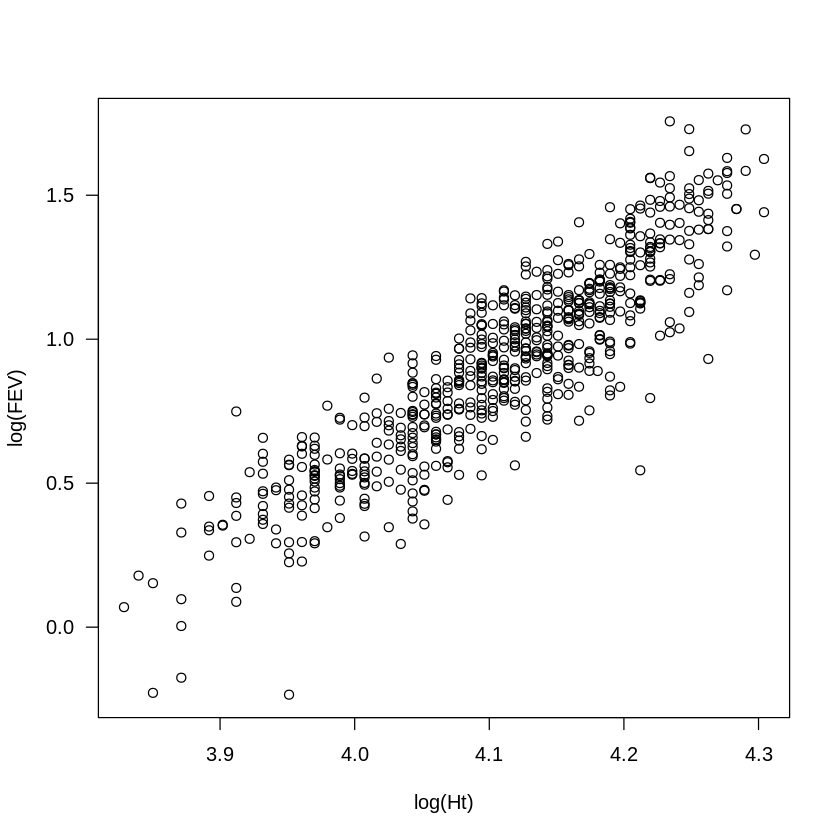

In [ ]:
# Xây dựng mô hình hồi quy với log(FEV) và log(Ht)
model_1 <- lm(log(FEV) ~ log(Ht), data = lungcap)

# Vẽ biểu đồ log-log
plot(log(FEV) ~ log(Ht), data = lungcap, las = 1)

Hệ số chặn (β₀) là -11.921, và hệ số cho log(Ht) là 3.124.  
Cả hai hệ số đều có ý nghĩa thống kê cao (p < 2.2 × 10⁻¹⁶).  
Giá trị t lớn cho thấy mối quan hệ mạnh giữa log(FEV) và log(Ht).


              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -2.2713118  0.0635310 -35.751 < 2.2e-16 ***
Ht           0.0521191  0.0010346  50.378 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


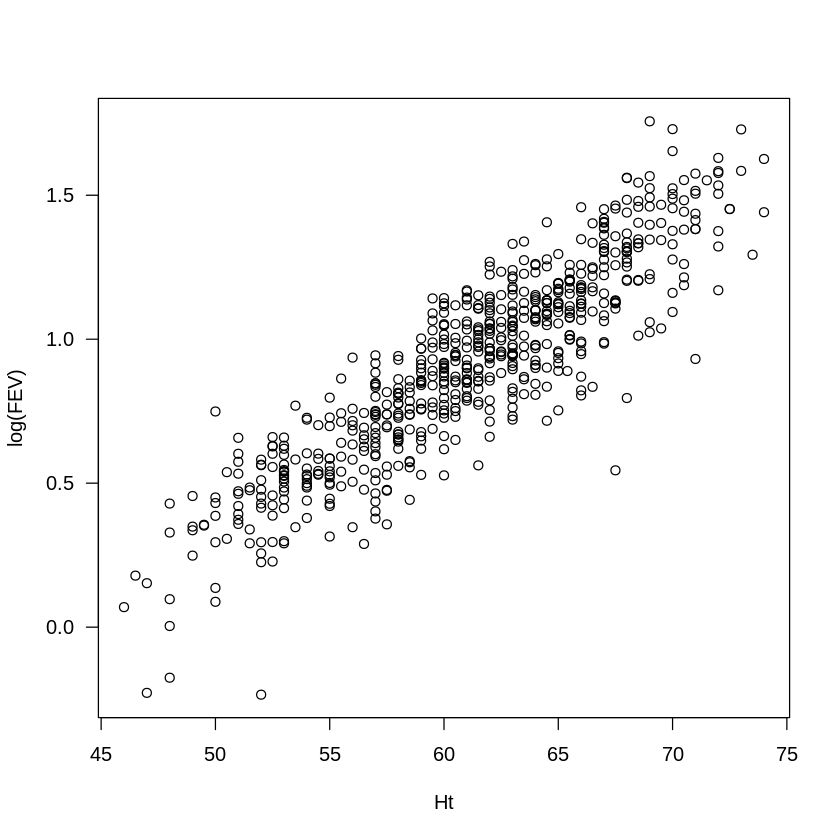

In [ ]:
# Xây dựng mô hình hồi quy với log(FEV) và log(Ht)
model_2 <- lm(log(FEV) ~ Ht, data = lungcap)

# Vẽ biểu đồ log-log
plot(log(FEV) ~ Ht, data = lungcap, las = 1)

Model 1: Using Ht
              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -11.921103   0.255768 -46.609 < 2.2e-16 ***
log(Ht)       3.124178   0.062232  50.202 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Model 2: Using log(Ht)
              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -2.2713118  0.0635310 -35.751 < 2.2e-16 ***
Ht           0.0521191  0.0010346  50.378 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-squared (Model 1): 0.7944652 
R-squared (Model 2): 0.7956073 


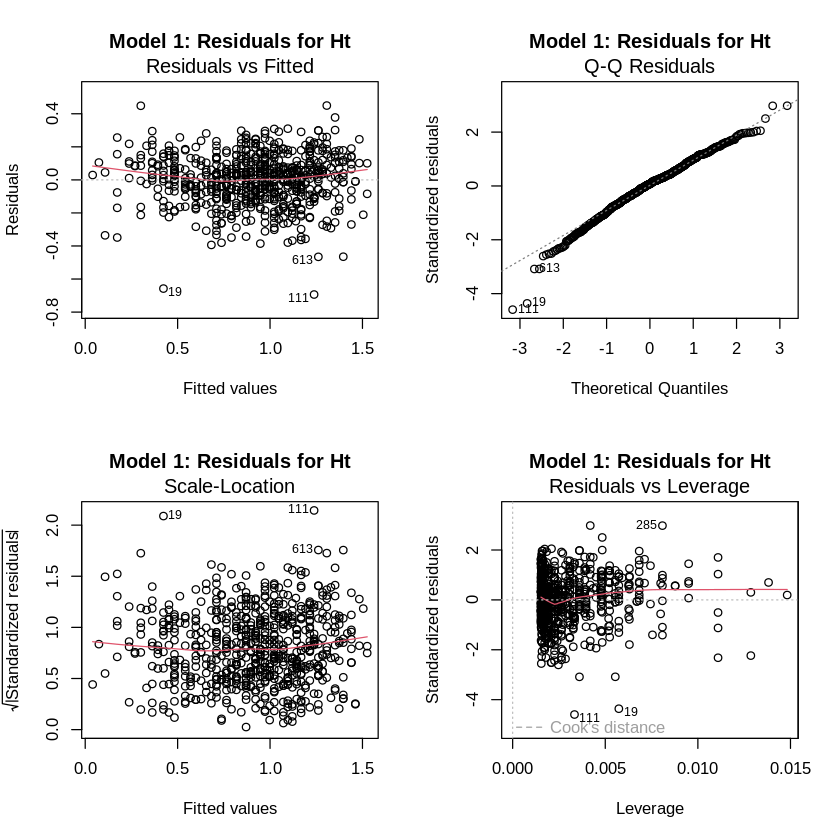

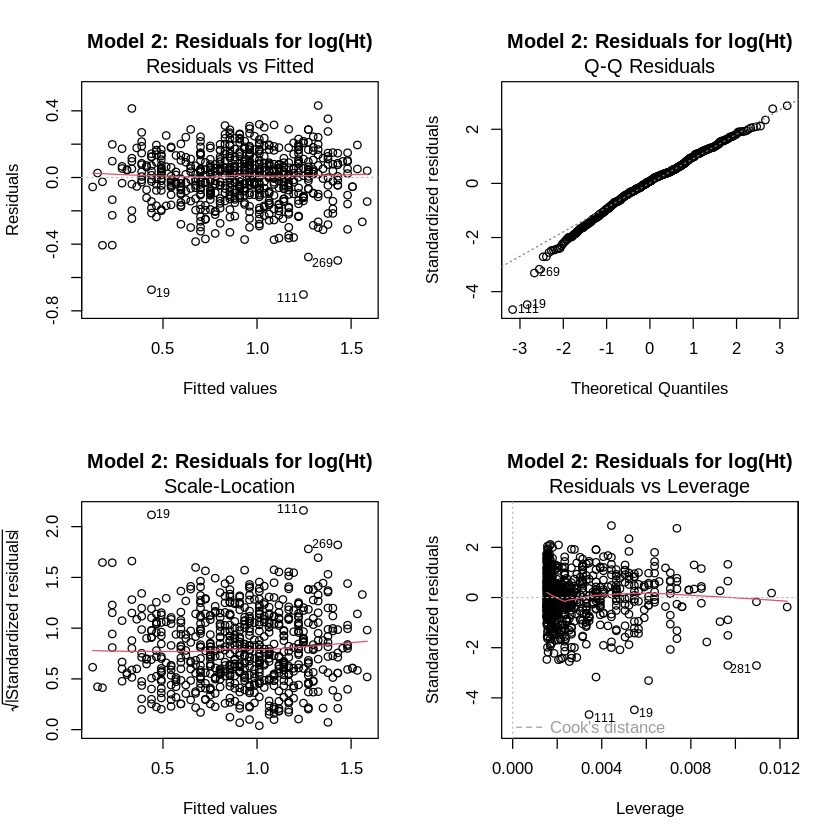

In [ ]:
# Hiển thị hệ số hồi quy cho cả hai mô hình
cat("Model 1: Using Ht\n")
printCoefmat(coef(summary(model_1)))

cat("\nModel 2: Using log(Ht)\n")
printCoefmat(coef(summary(model_2)))

# So sánh R-squared
cat("\nR-squared (Model 1):", summary(model_1)$r.squared, "\n")
cat("R-squared (Model 2):", summary(model_2)$r.squared, "\n")

# Vẽ biểu đồ phần dư cho hai mô hình
par(mfrow = c(2, 2))  # Tạo lưới biểu đồ
plot(model_1, main = "Model 1: Residuals for Ht")
plot(model_2, main = "Model 2: Residuals for log(Ht)")

# 3.10
+ Mô hình được trang bị cho dữ liệu nếm phô mai (bộ dữ liệu: phô mai):
  + Do Taste đối với log(H2S) gợi ý phương sai hơi không cố định
  + Một mô hình thay thế có thể đề xuất sử dụng log(Taste) làm phản hồi thay vì Taste.
+ Chứng tỏ rằng việc sử dụng log(Taste) làm phản hồi sẽ dẫn đến một mô hình kém.

In [ ]:
install.packages("GLMsData")
library(GLMsData)
data(cheese)
c <- cheese
head(c)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Taste,Acetic,H2S,Lactic
,<dbl>,<int>,<int>,<dbl>
1,12.3,94,23,0.86
2,20.9,174,155,1.53
3,39.0,214,230,1.57
4,47.9,317,1801,1.81
5,5.6,106,45,0.99
6,25.9,298,2000,1.09


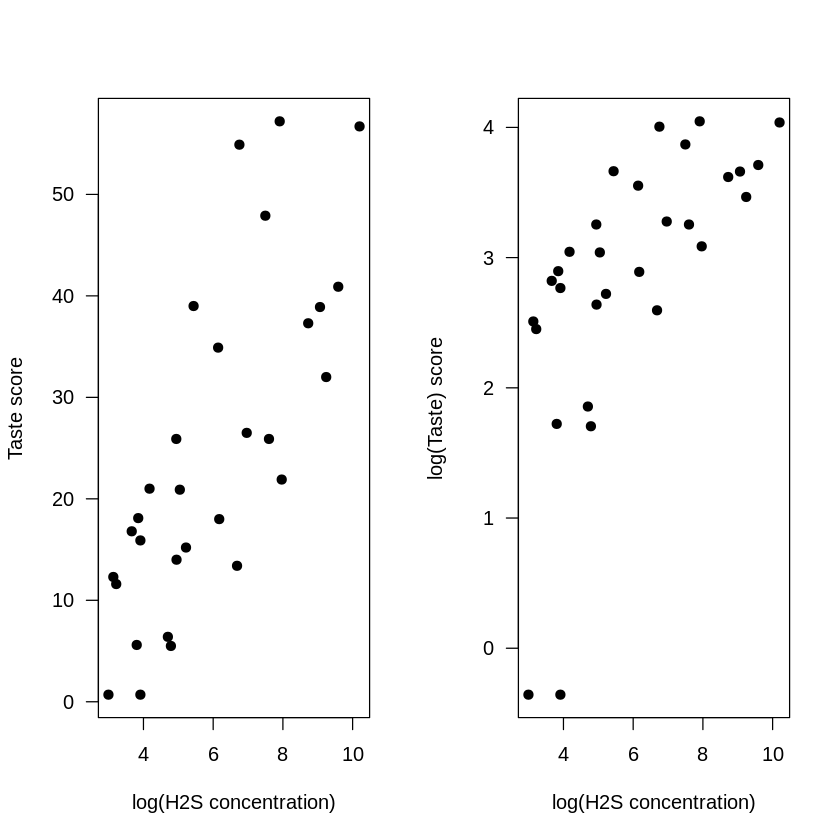

In [ ]:
# So sánh Taste và log(Taste) với log(H2s) => log(Taste) cho thấy dữ liệu tập trung hơn khi không sử dụng log(Taste)
par(mfrow=c(1,2))
plot(Taste ~ log(H2S), data=c, las=1, pch=19, xlab="log(H2S concentration)", ylab="Taste score")
plot(log(Taste) ~ log(H2S), data=c, las=1, pch=19, xlab="log(H2S concentration)", ylab="log(Taste) score")

Thiết lập 2 mô hình:
+ Mô hình Taste:
  + Taste=β0+β1log(H2S)+ϵ
+ Mô hình log(Taste):
  + log(Taste)=β0+β1log(H2S)+ϵ

In [ ]:
# xây dựng mô hình
## MH Taste: Taste = β0 +β1log(H2S) + ϵ
cheese.m1 <- lm(Taste ~ Acetic * log(H2S) * Lactic, data=cheese)
## MH Log(Taste): log(Taste)=β0+β1log(H2S)+ϵ
cheese.m1_ln <- lm(log(Taste) ~ Acetic * log(H2S) * Lactic, data=cheese)

summary(cheese.m1)
summary(cheese.m1_ln)



Call:
lm(formula = Taste ~ Acetic * log(H2S) * Lactic, data = cheese)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2373  -5.2621  -0.6691   5.5567  24.6739 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)            11.85914   68.88356   0.172    0.865
Acetic                 -0.28607    0.32504  -0.880    0.388
log(H2S)                0.02503   15.12740   0.002    0.999
Lactic                 -5.34378   48.84173  -0.109    0.914
Acetic:log(H2S)         0.03248    0.05771   0.563    0.579
Acetic:Lactic           0.18460    0.21701   0.851    0.404
log(H2S):Lactic         2.25137    9.16361   0.246    0.808
Acetic:log(H2S):Lactic -0.02017    0.03526  -0.572    0.573

Residual standard error: 10.56 on 22 degrees of freedom
Multiple R-squared:   0.68,	Adjusted R-squared:  0.5781 
F-statistic: 6.678 on 7 and 22 DF,  p-value: 0.0002641



Call:
lm(formula = log(Taste) ~ Acetic * log(H2S) * Lactic, data = cheese)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3602 -0.1268  0.0606  0.3228  1.2161 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)            -1.6955493  5.5834248  -0.304    0.764
Acetic                 -0.0136187  0.0263462  -0.517    0.610
log(H2S)                0.9255072  1.2261661   0.755    0.458
Lactic                  1.7588002  3.9589149   0.444    0.661
Acetic:log(H2S)         0.0005098  0.0046781   0.109    0.914
Acetic:Lactic           0.0103747  0.0175902   0.590    0.561
log(H2S):Lactic        -0.3622737  0.7427653  -0.488    0.631
Acetic:log(H2S):Lactic -0.0006208  0.0028581  -0.217    0.830

Residual standard error: 0.8558 on 22 degrees of freedom
Multiple R-squared:  0.5251,	Adjusted R-squared:  0.374 
F-statistic: 3.475 on 7 and 22 DF,  p-value: 0.01164


In [ ]:
# So sánh R^2, AIC và BIC
# R^2
cat("R² của Model 1:", summary(cheese.m1)$r.squared, "\n")
cat("R² của Model 2:", summary(cheese.m1_ln)$r.squared, "\n")
# AIC và BIC
cat("AIC của Model 1:", AIC(cheese.m1), "\n")
cat("AIC của Model 2:", AIC(cheese.m1_ln), "\n")
cat("BIC của Model 1:", BIC(cheese.m1), "\n")
cat("BIC của Model 2:", BIC(cheese.m1_ln), "\n")
cat("AIC/BIC Model 1:", AIC(cheese.m1)/BIC(cheese.m1),"\n")
cat("AIC/BIC Model 2:", AIC(cheese.m1_ln)/BIC(cheese.m1_ln),"\n")

R² của Model 1: 0.6799753 
R² của Model 2: 0.5251191 
AIC của Model 1: 235.244 
AIC của Model 2: 84.48709 
BIC của Model 1: 247.8548 
BIC của Model 2: 97.09786 
AIC/BIC Model 1: 0.9491203 
AIC/BIC Model 2: 0.870123 


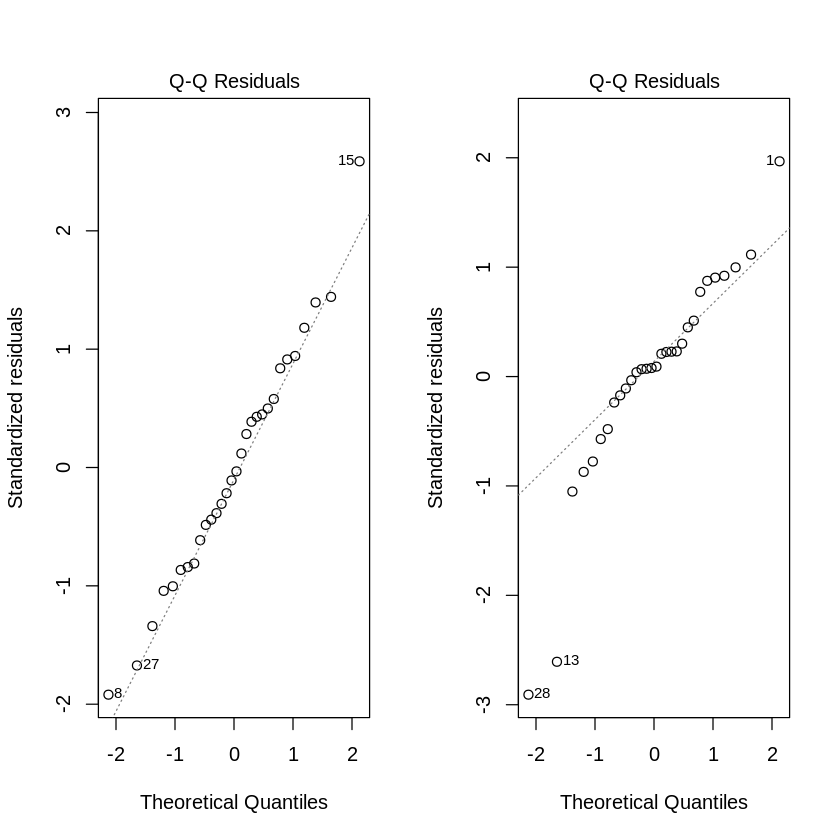

In [ ]:
# Kiểm tra đánh giá phần dư (Normal Q-Q Plot)
par(mfrow=c(1,2))
plot(cheese.m1, which=2)
plot(cheese.m1_ln, which=2)

- Dựa trên chỉ số standard error, AIC/BIC, mô hình log(Taste) cho kết quả dự báo cải thiện hơn so với mô hình thông thường Taste.
- Tuy nhiên, R^2 mô hình log(Taste) lại thấp hơn mô hình Taste (0.5251191, 0.6799753) cho thấy mô hình log(Taste) chỉ hiệu quả trên 52% tổng số dữ liệu ban đầu thấp hơn so với mô hình Taste

In [ ]:
# Kiểm tra tính chuẩn của phần dư cho Model 1 và Model 2
shapiro.test(resid(cheese.m1))  # Model 1
shapiro.test(resid(cheese.m1_ln))  # Model 2


	Shapiro-Wilk normality test

data:  resid(cheese.m1)
W = 0.98425, p-value = 0.9237



	Shapiro-Wilk normality test

data:  resid(cheese.m1_ln)
W = 0.8731, p-value = 0.001966


In [ ]:
# Tính phương sai phần dư cho mỗi mô hình
varM1 <- var(resid(cheese.m1))
varM2 <- var(resid(cheese.m1_ln))
cat("Phương sai phần dư của Model 1: ",varM1,"\n")
cat("Phương sai phần dư của Model 2: ",varM2,"\n")

Phương sai phần dư của Model 1:  84.56251 
Phương sai phần dư của Model 2:  0.5555819 


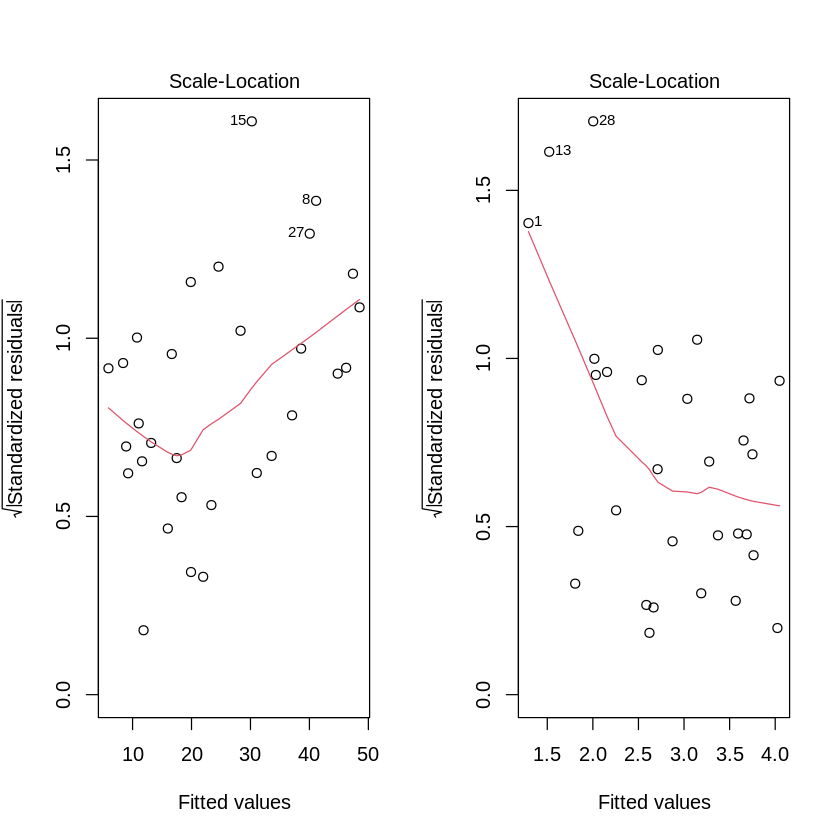

In [ ]:
# Kiểm tra đánh giá Phương sai không đồng nhất (Spread-Location)
par(mfrow=c(1,2))
plot(cheese.m1, which=3)
plot(cheese.m1_ln, which=3)

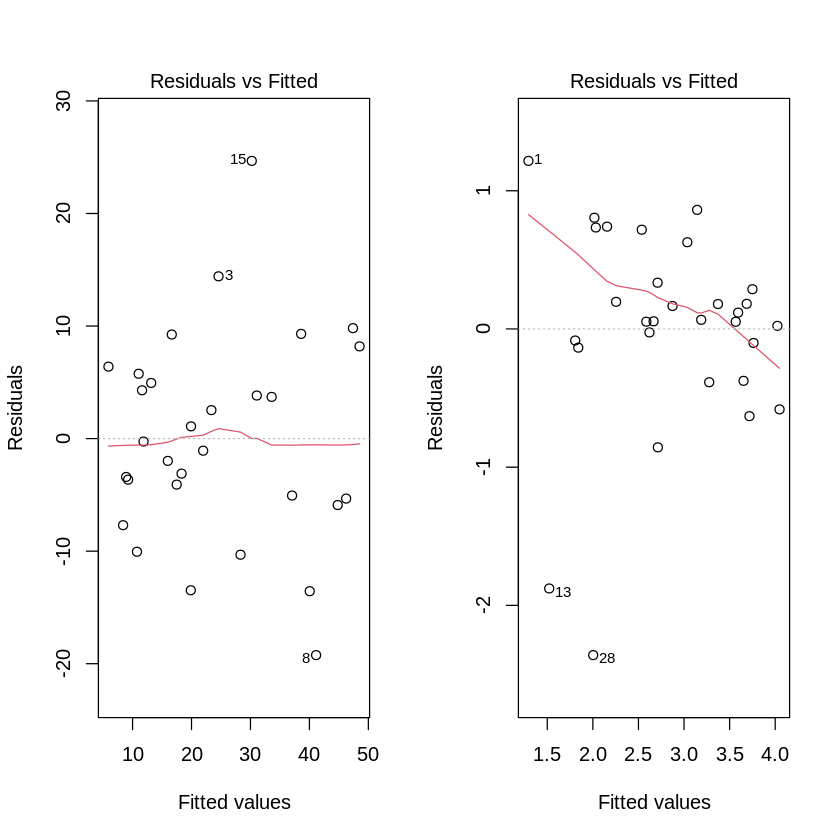

In [ ]:
# Kiểm tra đánh giá Phương sai không đồng nhất và quan hệ tuyến tính (Residuals vs Fitted)
par(mfrow=c(1,2))
plot(cheese.m1, which=1)
plot(cheese.m1_ln, which=1)

In [ ]:
# # Xác định các điểm ảnh hưởng lớn đến mô hình (Cook's Distance)
# par(mfrow=c(1,2))
# plot(cheese.m1, which=4)
# plot(cheese.m1_ln, which=4)

# # Kiểm tra các điểm ảnh hưởng lớn và đòn bẩy (leverage) (Residuals vs Leverage)

# par(mfrow=c(1,2))
# plot(cheese.m1, which=5)
# plot(cheese.m1_ln, which=5)


## 3.11

Một nghiên cứu [27] đã tổng hợp thông tin về thói quen tiêu thụ thức ăn của các loài cá khác nhau (bộ dữ liệu: fishfood). Mô hình hồi quy tuyến tính được ước lượng có dạng:

log μ̂ = β₀ + β₁logMaxWt + β₂logTemp + β₃logAR + β₄Food

trong đó μ=E[FoodCon] là mức tiêu thụ thức ăn hàng ngày dự đoán (tính theo phần trăm khối lượng cơ thể),
F = 0 với loài ăn thịt và
F = 1 với loài ăn thực vật, các biến khác được định nghĩa trong Bảng 3.7.

Yêu cầu:

1. Ước lượng mô hình được sử dụng trong nghiên cứu gốc.
2. Thực hiện phân tích chẩn đoán cho mô hình này.
3. Diễn giải mô hình.
4. Xác định xem có thể tìm được mô hình tốt hơn bằng cách xem xét các biến tương tác hay không.

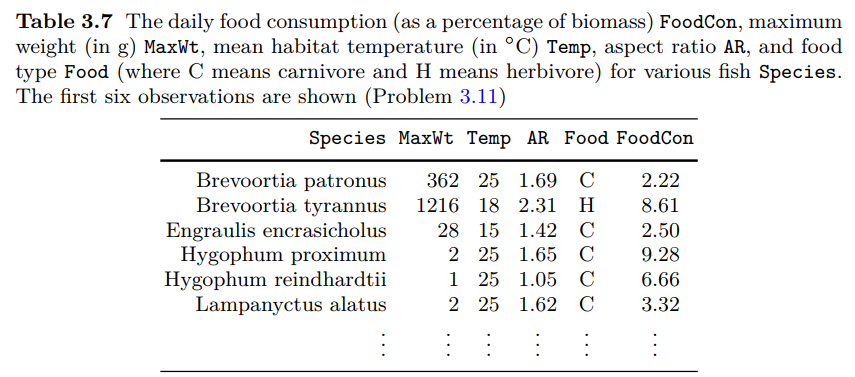

### 3.11.1 Model

In [ ]:
rm(list = ls())
library(data.table)
# install.packages(c('GLMsData'))
library(GLMsData)
data(fishfood)
head(fishfood)

,Species,MaxWt,Temp,AR,Food,FoodCon
,<fct>,<int>,<int>,<dbl>,<fct>,<dbl>
1,Brevoortia patronus,362,25,1.69,C,2.22
2,Brevoortia tyrannus,1216,18,2.31,H,8.61
3,Engraulis encrasicholus,28,15,1.42,C,2.50
4,Hygophum proximum,2,25,1.65,C,9.28
5,Hygophum reindhardtii,1,25,1.05,C,6.66
6,Lampanyctus alatus,2,25,1.62,C,3.32


In [ ]:
model <-  lm(log(FoodCon) ~  log(MaxWt) + log(Temp) + log(AR) + Food , data = fishfood)
summary(model)


Call:
lm(formula = log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + 
    Food, data = fishfood)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17929 -0.21921  0.07409  0.29573  0.86831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.27801    1.06856  -0.260   0.7966    
log(MaxWt)  -0.20962    0.03441  -6.091 1.43e-06 ***
log(Temp)    0.64385    0.33294   1.934   0.0633 .  
log(AR)      0.56505    0.21357   2.646   0.0132 *  
FoodH        1.49143    0.32872   4.537 9.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 28 degrees of freedom
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7539 
F-statistic:  25.5 on 4 and 28 DF,  p-value: 5.533e-09


log μ̂ = -0.27801 - 0.20962*log(MaxWt) + 0.64385*log(Temp) + 0.56505*log(AR) + 1.49143*FoodH


### 3.11.2 Diagnostic analysis of this model

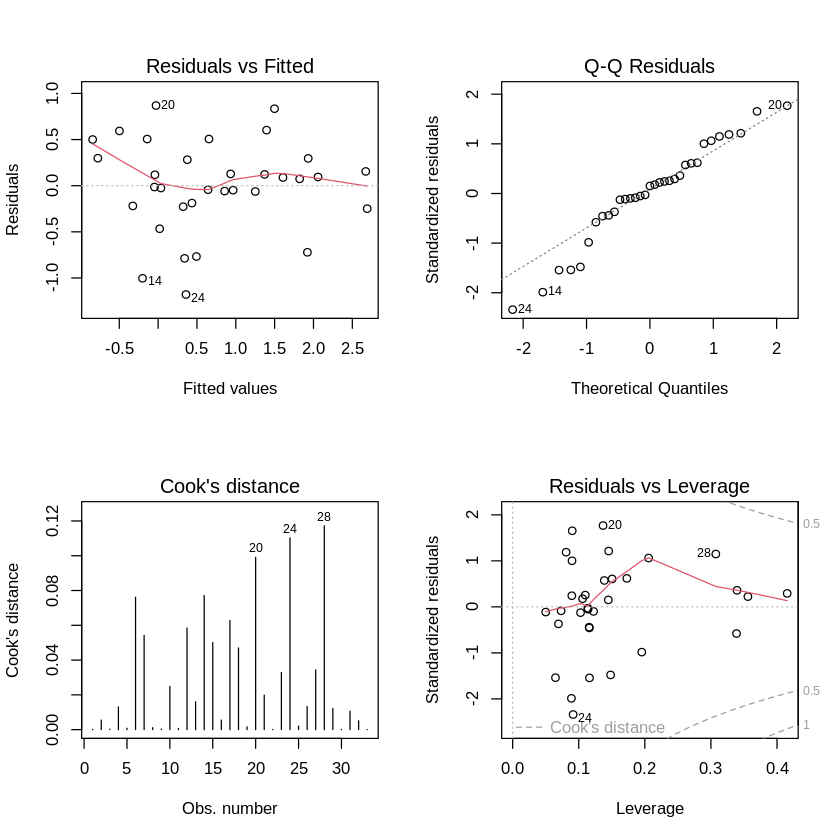

In [ ]:
par(mfrow=c(2,2))
plot(model , which = c(1,2,4,5))

1. Residuals vs Fitted
- Không có dạng hình rõ rệt, và thấy một vài residual của các quan sát lệch đáng kể so với đường trung bình.
- Có một số quan sát như 20, 14 và 24 thể hiện residuals khá xa đường trung bình.
- Phân tán không hoàn toàn đồng nhất, cho thấy dấu hiệu của heteroscedasticity (phương sai không đồng nhất) và tính tuyến tính không rõ ràng.
2. Q-Q Residuals
- Đa số cácquan sát nằm gần đường chéo, nhưng có vài quan sát như 20 và 24 lệch khá xa khỏi đường chuẩn. Điều này chỉ ra phần dư có thể không hoàn toàn tuân theo phân phối chuẩn, đặc biệt ở các giá trị 2 đầu.
3. Cook’s Distance
- Một số quan sát như 20, 24 và 28 có Cook’s distance cao, cho thấy đây là các điểm có ảnh hưởng đáng kể đến mô hình.
4. Residuals vs Leverage
- Quan sát 20 và 80 có leverage cao, nằm gần đường Cook’s distance giới hạn, cho thấy chúng có ảnh hưởng lớn đến mô hình.

### 3.11.3 Interpet Model

In [ ]:
summary(model)


Call:
lm(formula = log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + 
    Food, data = fishfood)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17929 -0.21921  0.07409  0.29573  0.86831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.27801    1.06856  -0.260   0.7966    
log(MaxWt)  -0.20962    0.03441  -6.091 1.43e-06 ***
log(Temp)    0.64385    0.33294   1.934   0.0633 .  
log(AR)      0.56505    0.21357   2.646   0.0132 *  
FoodH        1.49143    0.32872   4.537 9.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 28 degrees of freedom
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7539 
F-statistic:  25.5 on 4 and 28 DF,  p-value: 5.533e-09


- Intercept (Hệ số chặn): Giá trị ước lượng của log(FoodCon) khi tất cả các biến độc lập (log(MaxWt), log(Temp), và log(AR)) bằng 0 là -0.278. Tuy nhiên, p-value (0.7966) cho thấy hệ số này không có ý nghĩa thống kê.

- log(MaxWt): Hệ số là -0.209, nghĩa là khi trọng lượng tối đa của cá tăng, mức tiêu thụ thức ăn giảm, nếu các yếu tố khác không đổi. Hệ số này có ý nghĩa thống kê cao (𝑝 -value < 0.001).

- log(Temp): Hệ số là 0.643, cho thấy nhiệt độ có mối quan hệ tỉ lệ thuận với mức tiêu thụ thức ăn, nhưng p-value (0.063) chỉ ra rằng mối quan hệ này không có ý nghĩa thống kê ở mức ý nghĩa 0.05.

- log(AR): Hệ số là 0.565, cho thấy tỷ lệ kích thước (aspect ratio) tỉ lệ thuận và có ý nghĩa thống kê (
𝑝-value=0.013) với mức tiêu thụ thức ăn.

- FoodH: Hệ số là 1.49143, So với nhóm ăn thịt, nhóm cá ăn cỏ có lượng tiêu thụ thức ăn cao hơn trung bình 1.49143 đơn vị, giữ các yếu tố khác không đổi.

### 3.11.4. Find better model

In [ ]:
model2 <- lm(log(FoodCon) ~ log(MaxWt) * log(Temp) * log(AR) * Food, data=fishfood)
better_model <- step(model2)
AIC(model,better_model)
BIC(model,better_model)

Start:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) * log(Temp) * log(AR) * Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food + log(MaxWt):log(Temp) + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + log(MaxWt):Food + 
    log(Temp):Food + log(AR):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):log(Temp):Food + log(MaxWt):log(AR):Food + log(Temp):log(AR):Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food + log(MaxWt):log(Temp) + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + log(MaxWt):Food + 
    log(Temp):Food + log(AR):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):log(Temp):Food + log(MaxWt):log(AR):Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food + log(MaxWt):log(Temp) + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + log(MaxWt):Food + 
    log(Temp):Food + log(AR):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):log(Temp):Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + 

,df,AIC
,<dbl>,<dbl>
model,6,58.16817
better_model,8,51.46982


,df,BIC
,<dbl>,<dbl>
model,6,67.14722
better_model,8,63.44188


Từ AIC và BIC cho thấy better_model tốt hơn model gốc ban đầu được đưa ra.